In [58]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [59]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [60]:
np.random.seed(42)

x = dataset.data[:, 5:6] # Feature 5
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [61]:
regr = LinearRegression()
regr.fit(x_train, y_train)
r2_score = regr.score(x_test, y_test)

print(f"Coef: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2-Score: {r2_score}")

Coef: [9.1181022]
Intercept: -34.662307438406785
R2-Score: 0.4584649934303068


### Non-linear Transformation:

$\vec{x} =\left(\!
    \begin{array}{c}
      x_1 \\
      x_2
    \end{array}
  \!\right) $ Wir haben Datenpunkte mit z.B. 2 Features.  
  
$\vec{z} = \phi(\vec{x})$   Wir wollen dann eine Transformation mit dem Grad=2 ausführen.  

$\vec{z} =\left(\!
    \begin{array}{c}
      z_1 \\
      \vdots \\
      z_9
    \end{array}
  \!\right) $ Daraus resultierenden dann (in dem Beispiel) 6 Features.  

In [62]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2 # Hoch 2 Polynomgrad (Parabel)
pf = PolynomialFeatures(degree=degree)
pf.fit(x_train) # Mappen

x_train_transformed = pf.transform(x_train)
x_test_transformed = pf.transform(x_test)

In [63]:
print(x_train.shape, x_train_transformed.shape)
print(x_test.shape, x_test_transformed.shape)

(354, 1) (354, 3)
(152, 1) (152, 3)


In [69]:
print(f"Old num features: {pf.n_input_features_}")
print(f"New num features: {pf.n_output_features_}")
print("Old feature names: [x0]")
print(f"New feature names: {pf.get_feature_names()}")

Old num features: 1
New num features: 3
Old feature names: [x0]
New feature names: ['1', 'x0', 'x0^2']


#### Polynomial Regression:

$\vec{y} = \mathbf{Z}\vec{\beta} + \vec{\epsilon}$  
$\mathbf{Z}$ ist hier dann der Datensatz nach der Transformation.

In [65]:
poly_regr = LinearRegression()
poly_regr.fit(x_train_transformed, y_train)
r2_score = poly_regr.score(x_test_transformed, y_test)

print(f"Coef: {poly_regr.coef_}")
print(f"Intercept: {poly_regr.intercept_}")
print(f"R2-Score: {r2_score}")

Coef: [  0.         -19.12845562   2.181199  ]
Intercept: 55.61231071352657
R2-Score: 0.5685094410898874


#### Visualization

In [66]:
def plot_residuals(regr, x_train, y_train, x_test, y_test):
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)
    
    min_val = min(np.min(y_pred_train), np.min(y_pred_test))
    max_val = max(np.max(y_pred_train), np.max(y_pred_test))
    
    plt.scatter(y_pred_train, y_pred_train - y_train, color="blue")
    plt.scatter(y_pred_test, y_pred_test - y_test, color="red")
    plt.hlines(y=0, xmin=min_val, xmax=max_val)
    plt.legend(["Train", "Test"])
    plt.show()

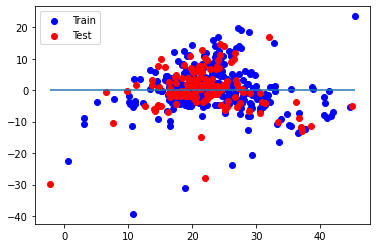

In [67]:
plot_residuals(regr, x_train, y_train, x_test, y_test)

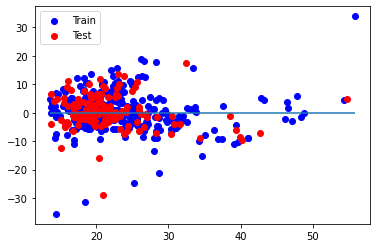

In [68]:
plot_residuals(poly_regr, x_train_transformed, y_train, x_test_transformed, y_test)

### Plot PolyRegression

(100, 1) (100, 1)
(100, 1) (100, 1)


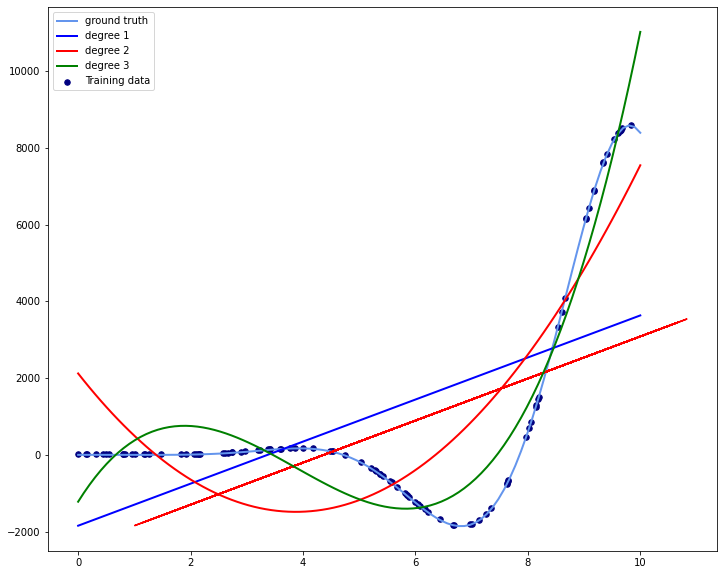

In [93]:
def f(x):
    return -x** 4 * np.cos(x)

x = np.linspace(0, 10, 100).reshape(-1 ,1) # von 0 - 10 gleichmäßig mit 100 Datenpunkten aufteilen
y = f(x)
print(x.shape, y.shape)

x_train = (np.random.rand(100) * 10).reshape(-1 ,1)
y_train = f(x_train) + np.random.normal(loc=10.0, scale=2.0) # leichte Zufallsveränderungen
print(x_train.shape, y_train.shape)

fig = plt.figure(figsize=(12,10))
plt.plot(x, y, color="cornflowerblue", linewidth=2, label="ground truth")
plt.scatter(x_train, y_train, color="navy", s=30, marker="o", label="Training data")

colors = ["blue", "red", "green"]
degree_list = [1, 2, 3] # 1 Linear, 2 Parabel usw
for idx, degree in enumerate(degree_list):
    pf = PolynomialFeatures(degree)
    pf.fit(x_train)
    x_train_transformed = pf.transform(x_train)
    poly_regr = LinearRegression()
    poly_regr.fit(x_train_transformed, y_train)
    
    x_transformed = pf.transform(x)
    y_pred = poly_regr.predict(x_transformed)
    plt.plot(x, y_pred, color=colors[idx], linewidth=2, label=f"degree {degree}")

plt.legend()
plt.show()

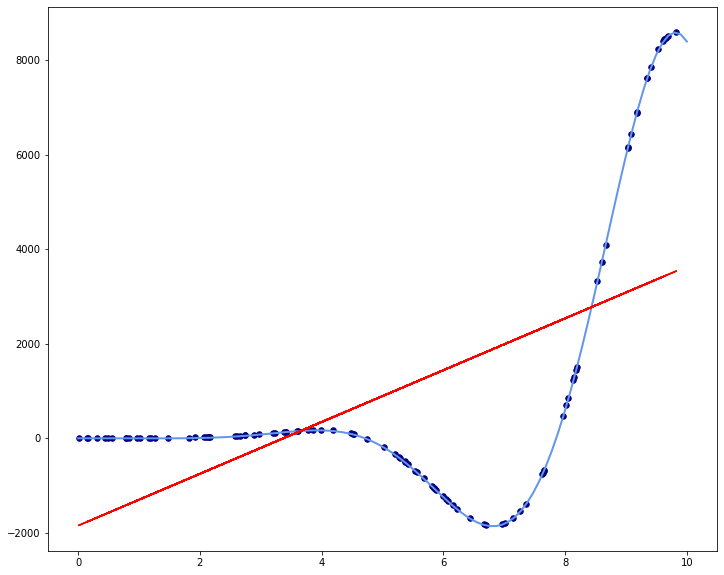

In [98]:
fig = plt.figure(figsize=(12,10))
plt.plot(x, y, color="cornflowerblue", linewidth=2, label="ground truth")
plt.scatter(x_train, y_train, color="navy", s=30, marker="o", label="Training data")

regg = LinearRegression()
regg.fit(x_train, y_train)
y_pred = regg.predict(x_train)
plt.plot(x_train, y_pred, color="red")
plt.show()